In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

from langchain_groq import ChatGroq
import os 
from dotenv import load_dotenv
load_dotenv()
llm=ChatGroq(model="llama3-8b-8192")  
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000024A65693390>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000024A65737E10>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [2]:
class prompt_chain_state(TypedDict):
    topic: str
    outline: str
    content:str

graph=StateGraph(prompt_chain_state)



In [3]:
## create nodes
def generate_outline(state:prompt_chain_state)->prompt_chain_state:
    topic=state["topic"]

    prompt=f"generate a outline for the topic {topic}"

    outline=llm.invoke(prompt).content
    state["outline"]=outline
    return state


In [4]:
def generate_blog(state:prompt_chain_state)->prompt_chain_state:
    outline=state["outline"]

    prompt=f"generate a blog content for the outline {outline}"

    content=llm.invoke(prompt).content
    state["content"]=content
    return state

In [5]:
graph.add_node("generate_outline", generate_outline)
graph.add_node("generate_blog", generate_blog)

graph.add_edge(START, "generate_outline")
graph.add_edge("generate_outline", "generate_blog")
graph.add_edge("generate_blog", END)

workflow=graph.compile()

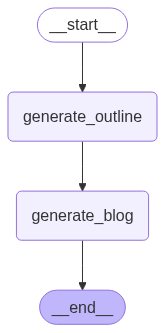

In [6]:
workflow

In [ ]:
initial_state={"topic": "Quantum computing"}
final_state=workflow.invoke(initial_state)
final_state

{'topic': 'Quantum computing',
 'outline': "Here is a detailed outline for the topic of Quantum Computing:\n\n**I. Introduction**\n\n* Definition of Quantum Computing\n* Brief history of Quantum Computing\n* Importance and potential applications of Quantum Computing\n\n**II. Fundamentals of Quantum Mechanics**\n\n* Wave-particle duality\n* Superposition and entanglement\n* Uncertainty principle\n* Quantum bits (qubits) and quantum gates\n\n**III. Quantum Computing Hardware**\n\n* Quantum processors: superconducting, ion trap, and topological qubits\n* Quantum control and error correction\n* Quantum memory and data storage\n\n**IV. Quantum Algorithms**\n\n* Shor's algorithm: factoring and cryptography\n* Grover's algorithm: search and optimization\n* Quantum simulation and quantum machine learning\n* Quantum error correction and fault-tolerant computing\n\n**V. Quantum Computing Software**\n\n* Programming languages: Q# (Microsoft), Qiskit (IBM), and Q (Rigetti Computing)\n* Quantum cir

"**The Future of Computing: An Introduction to Quantum Computing**\n\nIn recent years, the world of computing has been witnessing a revolution of sorts, with the emergence of a new technology that promises to transform the way we process information: Quantum Computing. In this blog post, we'll delve into the world of Quantum Computing, exploring its definition, history, importance, and potential applications. We'll also examine the fundamental principles of Quantum Mechanics, the hardware and software that make Quantum Computing possible, and the challenges and limitations that come with it. Finally, we'll look at the future directions and research that are shaping the landscape of Quantum Computing.\n\n**What is Quantum Computing?**\n\nQuantum Computing is a new type of computing that uses the principles of Quantum Mechanics to perform calculations and operations on data. Unlike classical computers, which use bits to store and process information, Quantum Computers use Quantum Bits, o